In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("IPL.csv")
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Total matches played?

In [5]:
df.shape[0]

74

Which team won the most matches?

In [6]:
match_winners=df['match_winner'].value_counts()
match_winners

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

In [7]:
match_winners.index

Index(['Gujarat', 'Rajasthan', 'Banglore', 'Lucknow', 'Punjab', 'Delhi',
       'Kolkata', 'Hyderabad', 'Chennai', 'Mumbai'],
      dtype='object', name='match_winner')

Text(0.5, 0, 'No. of matches won')

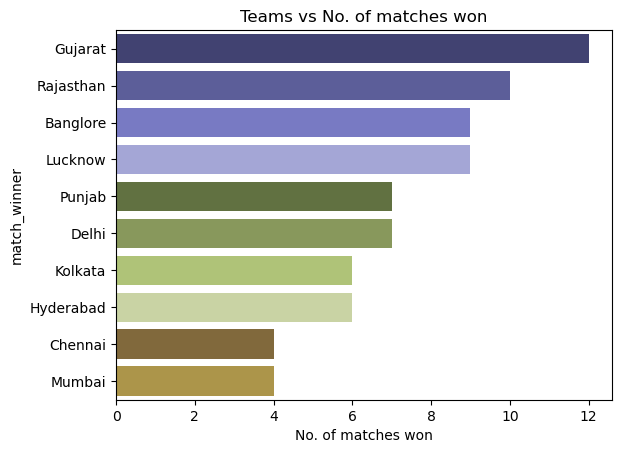

In [8]:
sns.barplot(x=match_winners.values,y=match_winners.index,palette='tab20b')
plt.title("Teams vs No. of matches won")
plt.xlabel("No. of matches won")

Toss decision trends

In [9]:
toss_results=df['toss_decision'].value_counts()

In [10]:
toss_results

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

Text(0.5, 1.0, 'Toss decision trends')

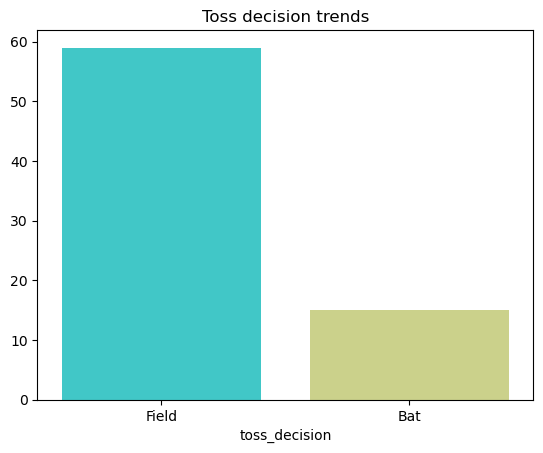

In [11]:
sns.barplot(x=toss_results.index,y=toss_results.values,palette='rainbow')
plt.title('Toss decision trends')

Toss winner vs match winner

In [12]:
df[df['toss_winner']==df['match_winner'] ].shape[0]

36

Toss wons by team:-

<Axes: xlabel='count', ylabel='toss_winner'>

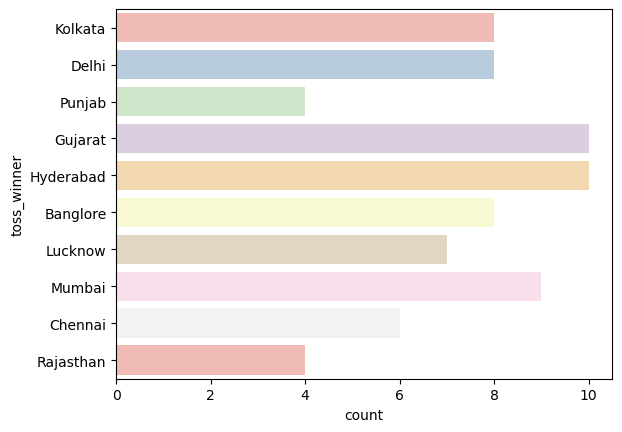

In [13]:
sns.countplot(y=df['toss_winner'],palette='Pastel1')

Most player of the match

In [14]:
ans=df['player_of_the_match'].value_counts()

In [15]:
pom=ans.head(10)

<Axes: ylabel='player_of_the_match'>

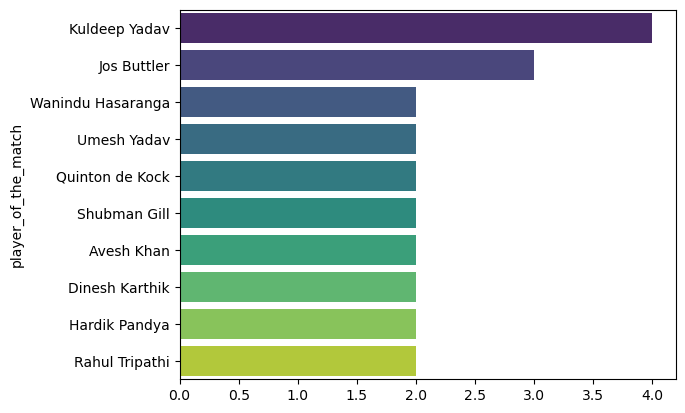

In [16]:
sns.barplot(y=pom.index,x=pom.values,palette='viridis')

Which venue hosted most matches?

In [17]:
df['venue'].value_counts()

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='venue'>

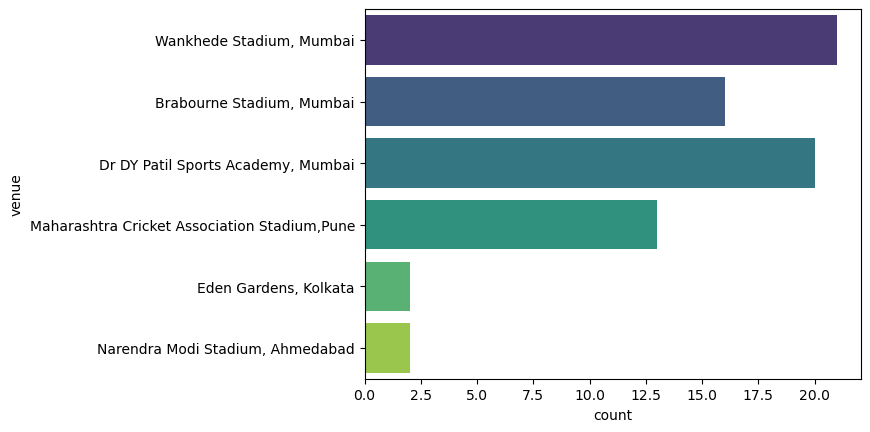

In [18]:
sns.countplot(df['venue'],palette='viridis')

What are the different match stages (e.g., group, semi-final, final)?

In [19]:
stg=df['stage']
stg.value_counts()

stage
Group      70
Playoff     3
Final       1
Name: count, dtype: int64

In [20]:
df['stage'].unique()

array(['Group', 'Playoff', 'Final'], dtype=object)

Q. Which team scored the highest first innings score?

In [21]:
df['firstbatting_team'] = df.apply(
    lambda row: row['team2'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'field'
                else row['team1'] if row['toss_winner'] == row['team2'] and row['toss_decision'] == 'field'
                else row['toss_winner'],
    axis=1
)


In [22]:
df.sort_values("first_ings_score",ascending=False).head(10)[['first_ings_score','firstbatting_team']]

,first_ings_score,firstbatting_team
33,222,Delhi
29,217,Kolkata
21,216,Banglore
18,215,Kolkata
6,210,Lucknow
65,210,Lucknow
4,210,Hyderabad
59,209,Banglore
54,208,Delhi
49,207,Hyderabad


Which player had the highest individual score (top_scorer)?

In [23]:
df.groupby("top_scorer")['highscore'].max().sort_values(ascending=False).head(5)

top_scorer
Quinton de Kock    140
Jos Buttler        116
Rajat Patidar      112
KL Rahul           103
Ruturaj Gaikwad     99
Name: highscore, dtype: int64

 Who had the best bowling performance (best_bowling)?

In [24]:
df[['best_bowling_wickets','best_bowling_runs']]=df['best_bowling_figure'].apply(lambda x: pd.Series(x.split('--'))).astype(int)
purplecap=df.sort_values(['best_bowling_wickets','best_bowling_runs'],ascending=[False,True]).head()

In [25]:
purplecap

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,firstbatting_team,best_bowling_wickets,best_bowling_runs
55,56,"May 9,2022","Dr DY Patil Sports Academy, Mumbai",Kolkata,Mumbai,Group,Mumbai,Field,165,9,...,Runs,52,Jasprit Bumrah,Ishan Kishan,51,Jasprit Bumrah,5--10,Mumbai,5,10
53,54,"May 8,2022","Wankhede Stadium, Mumbai",Banglore,Hyderabad,Group,Banglore,Bat,192,3,...,Runs,67,Wanindu Hasaranga,Faf du Plessis,73,Wanindu Hasaranga,5--18,Banglore,5,18
39,40,"April 27,2022","Wankhede Stadium, Mumbai",Gujarat,Hyderabad,Group,Gujarat,Field,195,6,...,Wickets,5,Umran Malik,W. Saha,68,Umran Malik,5--25,Gujarat,5,25
29,30,"April 18,2022","Brabourne Stadium, Mumbai",Kolkata,Rajasthan,Group,Kolkata,Field,217,5,...,Runs,7,Yuzvendra Chahal,Jos Buttler,103,Yuzvendra Chahal,5--40,Kolkata,5,40
34,35,"April 23,2022","Dr DY Patil Sports Academy, Mumbai",Gujarat,Kolkata,Group,Gujarat,Bat,156,9,...,Runs,8,Rashid Khan,Hardik Pandya,67,Andre Russell,4--5,Gujarat,4,5


What is the average margin of victory (by runs or wickets)?

In [26]:
avg_winning_byruns=df.query('`won_by`=="Runs" ')['margin'].mean()

In [27]:
avg_winning_byruns

np.float64(27.945945945945947)

In [28]:
avg_winning_bywiks=df.query('`won_by`=="Wickets" ')['margin'].mean()

In [29]:
avg_winning_bywiks

np.float64(6.0)

How often does winning the toss lead to winning the match?

In [30]:
prt=df.query("toss_winner==match_winner").shape[0]
total_matches=df.shape[0]
percentage=prt*100/total_matches
percentage

48.648648648648646

What are the most common toss decisions across stages?

Text(0.5, 1.0, 'Common-toss-decisions')

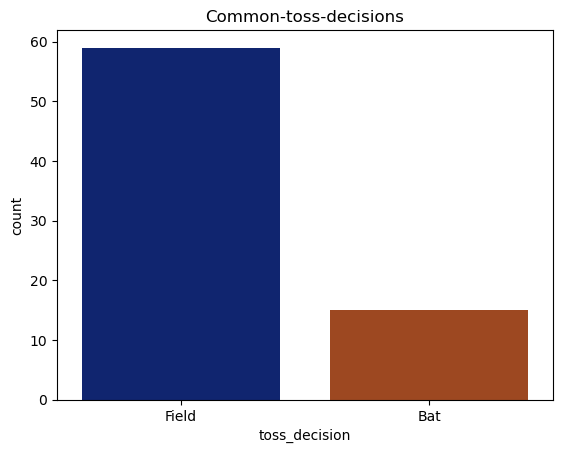

In [31]:
sns.countplot(x=df['toss_decision'],palette='dark')
plt.title("Common-toss-decisions")

Is there a trend in match winners based on toss decision (bat/field)?

In [32]:
field_wins=df.query("toss_winner==match_winner and toss_decision=='Field'").shape[0]
bat_wins=df.query("toss_winner==match_winner and toss_decision=='Bat'").shape[0]

In [33]:
print(f"The matches in which team won by choosing fields are {field_wins}.")
print(f"The matches in which team won by choosing bat are {bat_wins}.")

The matches in which team won by choosing fields are 29.
The matches in which team won by choosing bat are 7.


How has the total score changed over time?

<Axes: xlabel='match_id', ylabel='combined_score'>

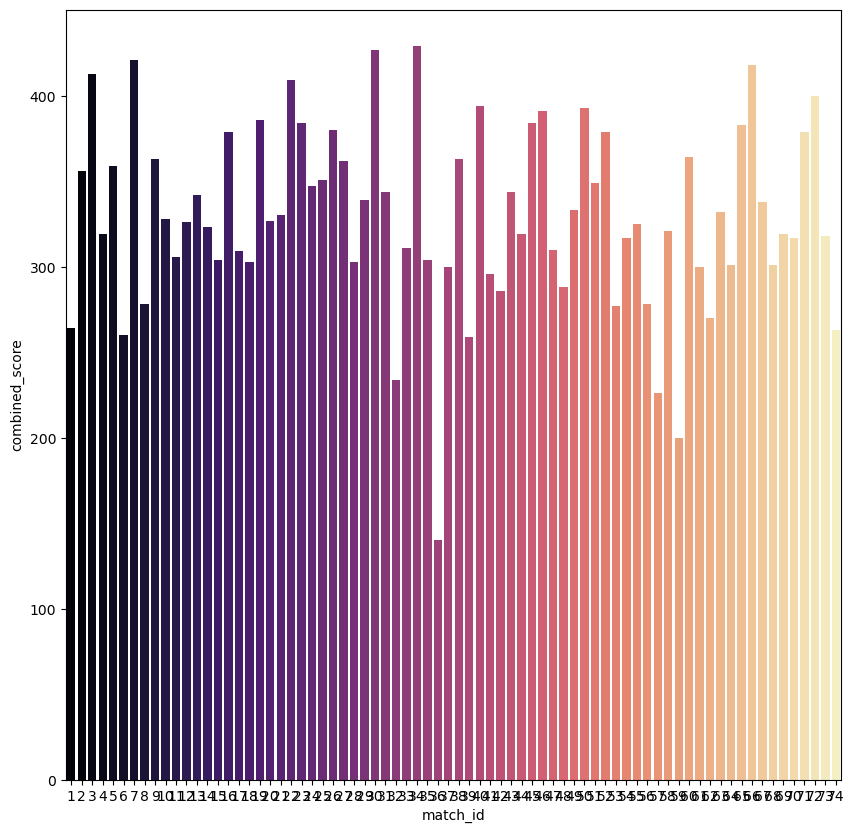

In [34]:
df['combined_score']=df['first_ings_score']+df['second_ings_score']
fig=plt.figure(figsize=(10,10))
sns.barplot(x='match_id',y='combined_score',palette='magma',data=df)

Do teams prefer chasing or setting targets in different venues?

In [35]:
trend=df.groupby("venue")['toss_decision'].value_counts()

In [36]:
trend

venue                                         toss_decision
Brabourne Stadium, Mumbai                     Field            13
                                              Bat               3
Dr DY Patil Sports Academy, Mumbai            Field            17
                                              Bat               3
Eden Gardens, Kolkata                         Field             2
Maharashtra Cricket Association Stadium,Pune  Field            11
                                              Bat               2
Narendra Modi Stadium, Ahmedabad              Bat               1
                                              Field             1
Wankhede Stadium, Mumbai                      Field            15
                                              Bat               6
Name: count, dtype: int64

Are certain venues more favorable to batting or bowling first?

In [37]:
df.groupby("venue")['toss_decision'].max()

venue
Brabourne Stadium, Mumbai                       Field
Dr DY Patil Sports Academy, Mumbai              Field
Eden Gardens, Kolkata                           Field
Maharashtra Cricket Association Stadium,Pune    Field
Narendra Modi Stadium, Ahmedabad                Field
Wankhede Stadium, Mumbai                        Field
Name: toss_decision, dtype: object

Which months had the most matches?

In [38]:
df[df['date']=='April11,2022']='April' # there was an error in data.

<Axes: xlabel='month', ylabel='count'>

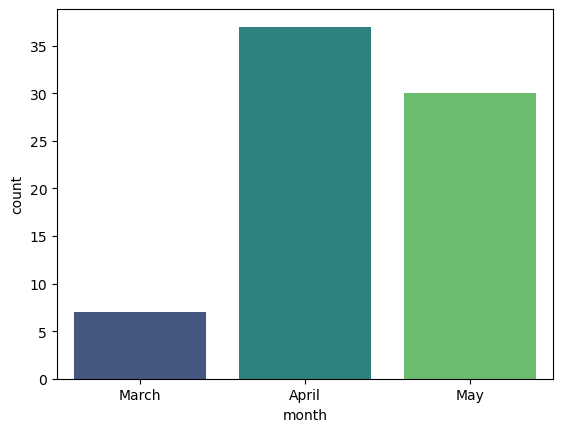

In [39]:
df['month']=df['date'].apply(lambda x: pd.Series(x.split(' ')[0]))
sns.countplot(x=df['month'],palette='viridis')

Are finals usually high scoring compared to group stages?

In [51]:
df.query(" `second_ings_score`=='April'")# this data is making problem.somehow it is affected during anaslysis.
df.loc[20]={
    'match_id': 'April',  # Or use a real ID if needed
    'date': 'April 10, 2022',
    'venue': 'Wankhede Stadium, Mumbai',
    'team1': 'Lucknow',
    'team2': 'Rajasthan',
    'stage': 'Group',
    'toss_winner': 'Lucknow',
    'toss_decision': 'Field',
    'first_ings_score': 165,
    'first_ings_wkts': 6,
    'second_ings_score': 162,
    'second_ings_wkts': 8,
    'match_winner': 'Rajasthan',
    'won_by': 'Runs',
    'margin': 3,
    'player_of_the_match': 'Yuzvendra Chahal',
    'top_scorer': 'Shimron Hetmyer',
    'highscore': 59,
    'best_bowling': 'Yuzvendra Chahal',
    'best_bowling_figure':'4--41',
    'firstbatting_team': 'Rajasthan',  # Because Lucknow chose to field
    'best_bowling_wickets': 4,
    'best_bowling_runs': 41,
    'combined_score': 165 + 162,
    'month': 'April'    
}

In [60]:
avg=(df[df['stage']=='Group']['combined_score'].mean())/2
avg

np.float64(164.5142857142857)

In [58]:
df['stage'].unique()

array(['Group', 'Playoff', 'Final'], dtype=object)

In [62]:
final_score=(df[df['stage']=='Final']['combined_score'].mean())/2
final_score

np.float64(131.5)

Compare the performance of team1 and team2

In [63]:
team1_wins = (df['match_winner'] == df['team1']).sum()
team2_wins = (df['match_winner'] == df['team2']).sum()

print(f"Team1 Wins: {team1_wins}")
print(f"Team2 Wins: {team2_wins}")

Team1 Wins: 37
Team2 Wins: 37


In [65]:
total_matches = len(df)
team1_win_pct = (team1_wins / total_matches) * 100
team2_win_pct = (team2_wins / total_matches) * 100

print(f"Team1 win %: {team1_win_pct:.2f}%")
print(f"Team2 win %: {team2_win_pct:.2f}%")

Team1 win %: 50.00%
Team2 win %: 50.00%


Which player has consistently performed (in both top_scorer and player_of_the_match)?

In [76]:
top_player=df[df['top_scorer']==df['player_of_the_match']]['top_scorer'].value_counts().head(10)

Text(0, 0.5, 'Players')

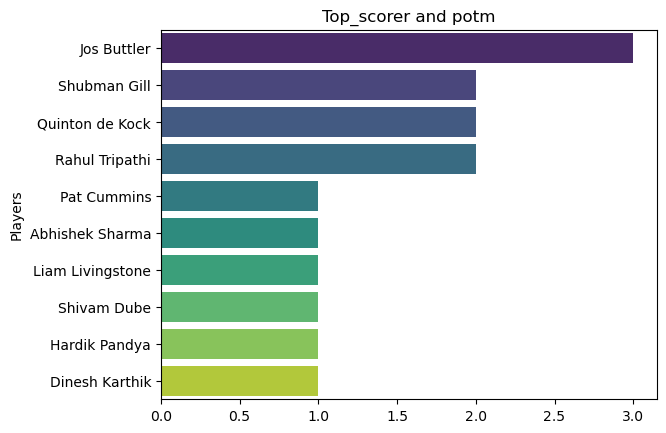

In [82]:
sns.barplot(x=top_player.values,y=top_player.index,palette='viridis')
plt.title("Top_scorer and potm")
plt.ylabel("Players")

Which team has won by the biggest margin?

In [91]:
df[df['won_by']=='Runs'].sort_values("margin",ascending=False)[['match_winner','won_by','margin']].head()

,match_winner,won_by,margin
54,Chennai,Runs,91
52,Lucknow,Runs,75
53,Banglore,Runs,67
56,Gujarat,Runs,62
4,Rajasthan,Runs,61


 Advanced/Group Analysis

Group matches by venue and analyze win percentages

In [93]:
matches_per_venue = df['venue'].value_counts()
matches_per_venue

venue
Wankhede Stadium, Mumbai                        22
Dr DY Patil Sports Academy, Mumbai              19
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

In [96]:
wins_by_venue = df.groupby(['venue', 'match_winner']).size().reset_index(name='wins')
wins_by_venue

,venue,match_winner,wins
0,"Brabourne Stadium, Mumbai",Delhi,4
1,"Brabourne Stadium, Mumbai",Gujarat,2
2,"Brabourne Stadium, Mumbai",Hyderabad,2
3,"Brabourne Stadium, Mumbai",Lucknow,2
4,"Brabourne Stadium, Mumbai",Mumbai,1
5,"Brabourne Stadium, Mumbai",Punjab,2
6,"Brabourne Stadium, Mumbai",Rajasthan,3
7,"Dr DY Patil Sports Academy, Mumbai",Banglore,2
8,"Dr DY Patil Sports Academy, Mumbai",Chennai,3
9,"Dr DY Patil Sports Academy, Mumbai",Delhi,2


In [100]:
# Total matches at each venue
total_matches = df.groupby('venue').size().reset_index(name='total_matches')

# Merge with wins
win_percent_df = pd.merge(wins_by_venue, total_matches, on='venue')

# Calculate win % for each team at each venue
win_percent_df['win_percentage'] = (win_percent_df['wins'] / win_percent_df['total_matches']) * 100

win_percent_df

,venue,match_winner,wins,total_matches,win_percentage
0,"Brabourne Stadium, Mumbai",Delhi,4,16,25.000000
1,"Brabourne Stadium, Mumbai",Gujarat,2,16,12.500000
2,"Brabourne Stadium, Mumbai",Hyderabad,2,16,12.500000
3,"Brabourne Stadium, Mumbai",Lucknow,2,16,12.500000
4,"Brabourne Stadium, Mumbai",Mumbai,1,16,6.250000
5,"Brabourne Stadium, Mumbai",Punjab,2,16,12.500000
6,"Brabourne Stadium, Mumbai",Rajasthan,3,16,18.750000
7,"Dr DY Patil Sports Academy, Mumbai",Banglore,2,19,10.526316
8,"Dr DY Patil Sports Academy, Mumbai",Chennai,3,19,15.789474
9,"Dr DY Patil Sports Academy, Mumbai",Delhi,2,19,10.526316
